# Computational electrodynamics - Homework 1

### Finite differences scheme to solve the stationary point solutions of the Lagrangian $\mathcal{L}(\mathbf{q},\mathbf{\dot{q}})=\frac{1}{\alpha}(\mathbf{\dot{q}},\mathbf{\dot{q}})_{\mathcal{R}}-(\mathbf{q},\mathbf{q})_{\mathcal{R}}$

$\mathbf{q}$ and $\mathbf{\dot{q}}$ are real valued functions on the periodic interval $[0,2 \pi)$, subject to the constraints $\mathbf{q}(0)=l~\in~\mathbb{R}$ and $\mathbf{\dot{q}}(0)=v~\in~\mathbb{R}$.

From the matrix notation of the differential equation that we defined in the notes in (6.12). We are going to solve the linear system in the form AX=b 

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-poster")

In [2]:
#Define constants
l=1    #From the initial value q(0)=l
v=1    #From the initial value dq(0)=v
a=2    #Coefficient alpha in the lagrangian
n = 1000    #Number of points
h = (2*np.pi-0) / n   #Separation between points in the t vector

In [37]:
# Define matrix A according to (6.12) from the solution provided for the approximation scheme
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[1, 1] = 1
A[n, n] = 1
for i in range(2, n):
    A[i, i-1] = 1
    A[i, i] =((a**2)*(h**2) -2)
    A[i, i+1] = 1

# print(D[0:6,0:6])

In [36]:
# Define vector b
b = np.zeros(n+1)
b[0] = l 
b[1] =(1-((a**2)*(h**2)/2))*l+h*v
b[-1] = l #Because of the periodicity 
# print(q)

In [38]:
# solve the linear equations
y = np.linalg.solve(A, b)

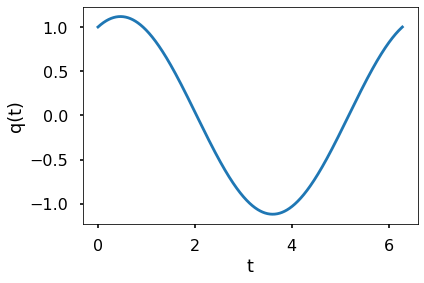

In [39]:
t = np.linspace(0, 2*np.pi, n+1)
# plt.figure(figsize=(6,5))
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('q(t)')
plt.show()

On a first attempt, we can see that we found an oscillatory solution for the differential equation, which is what we expected for the Lagrangian that was defined --> It has the form of a harmonic oscillator lagrangian.

Now, let's define a function so that we can analyze the behavior of the solutions before different variations of the input parameters:

In [40]:
def solve_q(l,v,a,n):
    h = (2*np.pi-0) / n
    
    # Define matrix A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[1, 1] = 1
    A[n, n] = 1
    for i in range(2, n):
        A[i, i-1] = 1
        A[i, i] =((a**2)*(h**2) -2)
        A[i, i+1] = 1
        
   # Define vector b
    b = np.zeros(n+1)
    b[0] = l 
    b[1] =(1-((a**2)*(h**2)/2))*l+h*v
    b[-1] = l #Because of the periodicity 
    
    # solve the linear equations
    y = np.linalg.solve(A, b)
    
    return y

#### First analysis:
Take $\alpha~\in~\mathbb{N}$. Show that the program finds the standard harmonic oscillator solutions for arbitrary l and v.


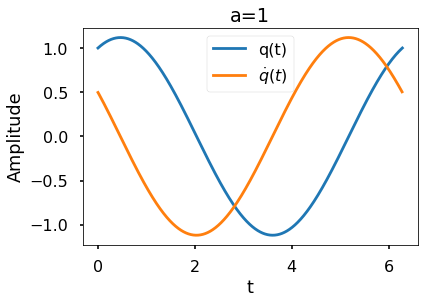

In [63]:
#Define constants
l=1
v=0.5
n=1000
a1=1
t = np.linspace(0, 2*np.pi, n+1)
plt.plot(t, solve_q(l,v,a1,n),label='q(t)')
plt.plot(t[0:1000], np.diff(solve_q(l,v,a,n))/(h), label='$\dot{q}(t)$')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.title('a=1')
plt.show()

From the previous plot, we can see that $q(t)$ and $\dot{q}(t)$ both have an oscillatory behaviour. For $\alpha=1$, we can see that they both have a phase difference, but their period seems to be similar. the solutions at $t=0$ agree with the initial values that were defined, in this case $q(0)=l=1$ and $\dot{q}(0)=v=0.5$. A similar behavious can be seen in the next example, where $\alpha=3$, $q(0)=l=3$ and $\dot{q}(0)=v=-1$.

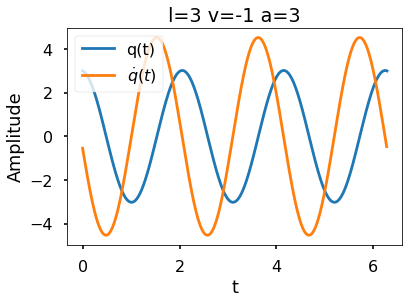

In [61]:
#Define constants
l=3
v=-1
n=1000
a2=3
t = np.linspace(0, 2*np.pi, n+1)
plt.plot(t, solve_q(l,v,a2,n),label='q(t)')
plt.plot(t[0:1000], np.diff(solve_q(l,v,a2,n))/(2*h), label='$\dot{q}(t)$')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.title('l=3 v=-1 a=3')
plt.show()

#### Second analysis:
Set $\alpha$ to be a non-integer value, e.g. 5.5. What happens to $q$ and $\dot{q}$?

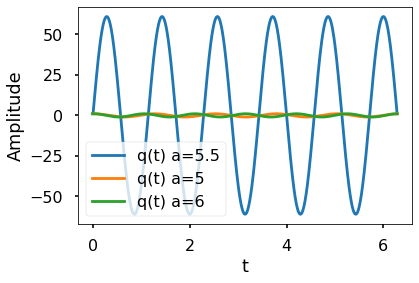

In [75]:
#Define constants
l=1
v=0.5
n=1000
a=5.5
t = np.linspace(0, 2*np.pi, n+1)
plt.plot(t, solve_q(l,v,a,n),label='q(t) a=5.5')
plt.plot(t, solve_q(l,v,5,n),label='q(t) a=5')
plt.plot(t, solve_q(l,v,6,n),label='q(t) a=6')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

When $\alpha$ is defined with a non-integer value it exhibits an interesting behaviour: We can see that the amplitude seems to diverge. If we compare, for example, the solutions for $q(t)$ when $\alpha=5$ or $\alpha=6$ we can see that they are similar in amplitude. We could expect to get a similar solution for the in between values, but this is not the case. Something similar happens with the solutions of $\dot{q}(t)$, which can be seen in the next figure:

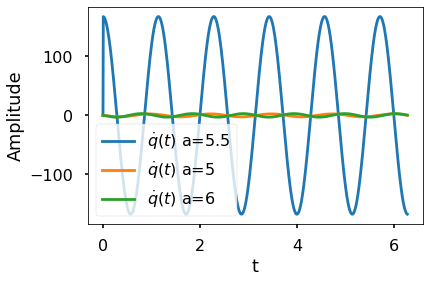

In [77]:
#Define constants
l=1
v=0.5
n=1000
a=5.5
t = np.linspace(0, 2*np.pi, n+1)
plt.plot(t[0:1000], np.diff(solve_q(l,v,a,n))/(2*h), label='$\dot{q}(t)$ a=5.5')
plt.plot(t[0:1000], np.diff(solve_q(l,v,5,n))/(2*h), label='$\dot{q}(t)$ a=5')
plt.plot(t[0:1000], np.diff(solve_q(l,v,6,n))/(2*h), label='$\dot{q}(t)$ a=6')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

An additional feature that we can see in the previous figure is the discontinuity around t=0. In the next figure we can also see that the divergence in the amplitude is more pronounced close to n+0.5. For $\alpha$ with decimals close to an integer, the variation in amplitude is not very drastic.


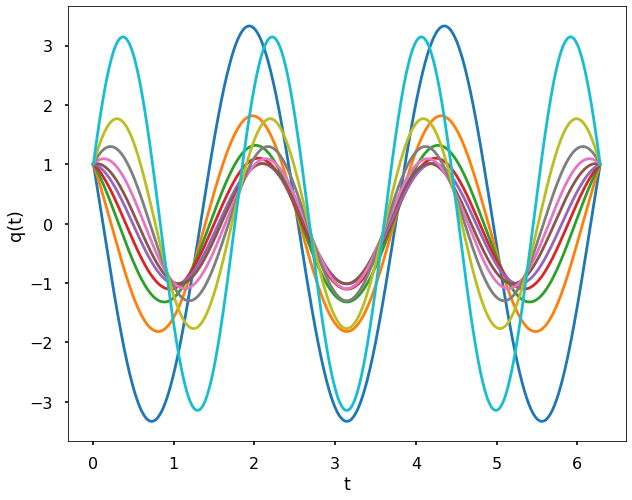

In [88]:
#Define constants
l=1
v=1
n=1000
t = np.linspace(0, 2*np.pi, n+1)
plt.figure(figsize=(10,8))
for a in np.linspace(2.6,3.4,10):
    plt.plot(t, solve_q(l,v,a,n))
plt.xlabel('t')
plt.ylabel('q(t)')
plt.show()

#### Analysis of the divergence of the amplitude of $q(t)$ depending on the value of $\alpha$:

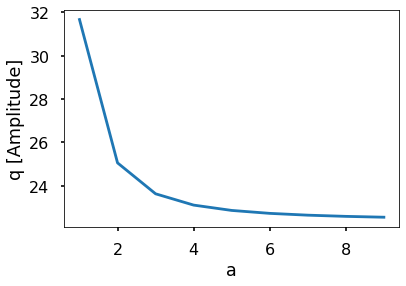

In [87]:
#When alpha is integer:
l=1
v=1
n=1000
t = np.linspace(0, 2*np.pi, n+1)
# plt.figure(figsize=(10,8))

q_amp=np.zeros(9)
for a in range(1,10,1):
     q_amp[a-1]=np.sqrt(np.dot(solve_q(l,v,a,n),solve_q(l,v,a,n)))
  
plt.plot(range(1,10,1), q_amp)
plt.xlabel('a')
plt.ylabel('q [Amplitude]')
plt.show()

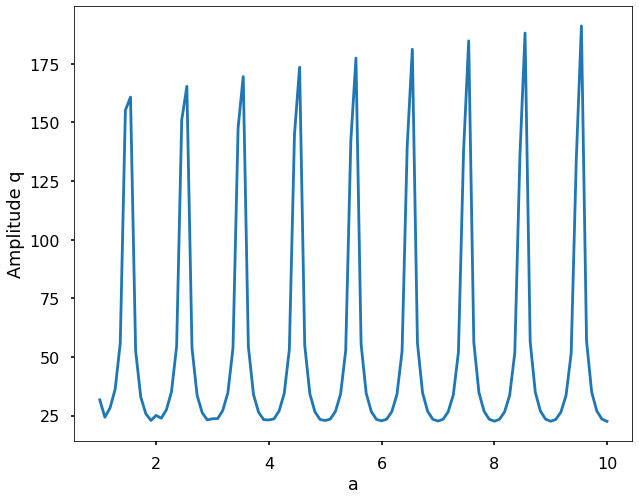

In [91]:
#For non integer alpha 
l=1
v=1
n=1000
t = np.linspace(0, 2*np.pi, n+1)
plt.figure(figsize=(10,8))

pn=100 #Number of points 

q_amp=np.zeros(pn)
i=0
for a in np.linspace(1,10,pn):
    q_amp[i]=np.sqrt(np.dot(solve_q(l,v,a,n),solve_q(l,v,a,n)))
    i+=1
  
plt.plot(np.linspace(1,10,pn), q_amp)
plt.xlabel('a')
plt.ylabel('Amplitude q')
plt.show()